<a href="https://colab.research.google.com/github/Kamruzzaman2200/Ai/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [37]:
df = pd.read_csv('/content/drive/MyDrive/Heart disease/heart_disease.csv')

In [38]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [40]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


#Handeling null Values

In [41]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [42]:
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

#Split dataset

In [66]:
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify=y

#Normalize features

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

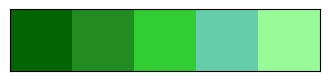

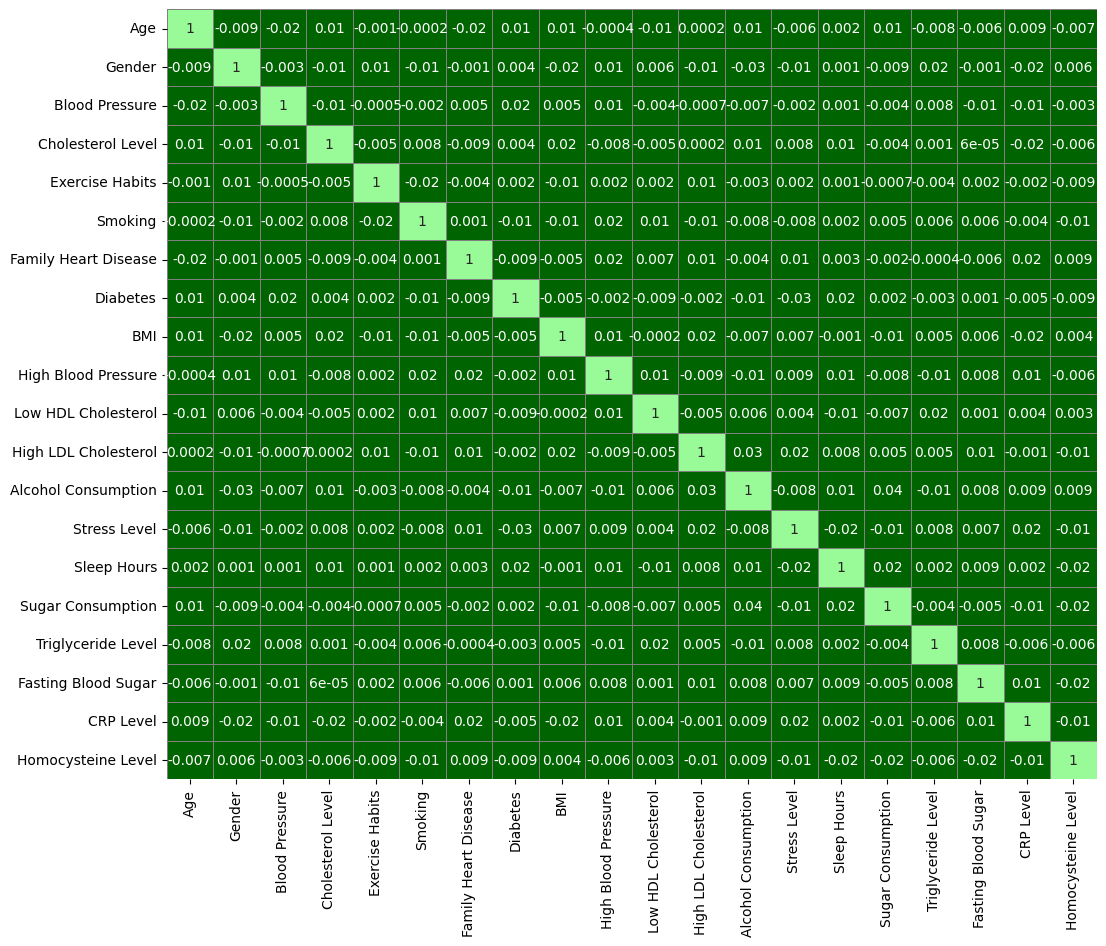

In [45]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors), size=0.8)
    plt.tick_params(axis='both', labelsize=0, length=0)
    return customPalette

pal = ['#006400', '#228B22', '#32CD32', '#66CDAA', '#98FB98']
custom_palette(pal)

fig, ax=plt.subplots(figsize=(12,10))
sns.heatmap(X.corr(),annot=True,fmt='0.1g',cmap=pal,cbar=False,linewidths=0.5,linecolor='grey')

#Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_lr_resampled = model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr_resampled = accuracy_score(y_test, y_pred_lr_resampled)
report_lr_resampled = classification_report(y_test, y_pred_lr_resampled)
conf_matrix_lr_resampled = confusion_matrix(y_test, y_pred_lr_resampled)

print(f"Accuracy (Logistic Regression with SMOTE): {accuracy_lr_resampled}")
print("Classification Report (Logistic Regression with SMOTE):\n", report_lr_resampled)
print("Confusion Matrix (Logistic Regression with SMOTE):\n", conf_matrix_lr_resampled)

# Store metrics for comparison
precision_lr_resampled = float(report_lr_resampled.split()[7])
recall_lr_resampled = float(report_lr_resampled.split()[8])
f1_lr_resampled = float(report_lr_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_lr_resampled = model.predict_proba(X_test_scaled)[:, 1]
    auc_lr_resampled = roc_auc_score(y_test, y_prob_lr_resampled)
    print(f"AUC-ROC (Logistic Regression with SMOTE): {auc_lr_resampled}")
except AttributeError:
    auc_lr_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (Logistic Regression with SMOTE): 0.5165
Classification Report (Logistic Regression with SMOTE):
               precision    recall  f1-score   support

           0       0.79      0.54      0.64      1600
           1       0.19      0.43      0.26       400

    accuracy                           0.52      2000
   macro avg       0.49      0.48      0.45      2000
weighted avg       0.67      0.52      0.56      2000

Confusion Matrix (Logistic Regression with SMOTE):
 [[861 739]
 [228 172]]
AUC-ROC (Logistic Regression with SMOTE): 0.4801937499999999


#Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
model_nb_resampled = GaussianNB()
model_nb_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_nb_resampled = model_nb_resampled.predict(X_test_scaled)

# Evaluate the model
accuracy_nb_resampled = accuracy_score(y_test, y_pred_nb_resampled)
report_nb_resampled = classification_report(y_test, y_pred_nb_resampled)
conf_matrix_nb_resampled = confusion_matrix(y_test, y_pred_nb_resampled)

print(f"Accuracy (Naive Bayes with SMOTE): {accuracy_nb_resampled}")
print("Classification Report (Naive Bayes with SMOTE):\n", report_nb_resampled)
print("Confusion Matrix (Naive Bayes with SMOTE):\n", conf_matrix_nb_resampled)

# Store metrics for comparison
precision_nb_resampled = float(report_nb_resampled.split()[7])
recall_nb_resampled = float(report_nb_resampled.split()[8])
f1_nb_resampled = float(report_nb_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_nb_resampled = model_nb_resampled.predict_proba(X_test_scaled)[:, 1]
    auc_nb_resampled = roc_auc_score(y_test, y_prob_nb_resampled)
    print(f"AUC-ROC (Naive Bayes with SMOTE): {auc_nb_resampled}")
except AttributeError:
    auc_nb_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (Naive Bayes with SMOTE): 0.544
Classification Report (Naive Bayes with SMOTE):
               precision    recall  f1-score   support

           0       0.78      0.59      0.68      1600
           1       0.17      0.34      0.23       400

    accuracy                           0.54      2000
   macro avg       0.48      0.47      0.45      2000
weighted avg       0.66      0.54      0.59      2000

Confusion Matrix (Naive Bayes with SMOTE):
 [[951 649]
 [263 137]]
AUC-ROC (Naive Bayes with SMOTE): 0.47125468749999994


#Support Vector Machine

In [70]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
model_svm_resampled = SVC(random_state=42, probability=True) # probability=True needed for AUC-ROC
model_svm_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svm_resampled = model_svm_resampled.predict(X_test_scaled)

# Evaluate the model
accuracy_svm_resampled = accuracy_score(y_test, y_pred_svm_resampled)
report_svm_resampled = classification_report(y_test, y_pred_svm_resampled)
conf_matrix_svm_resampled = confusion_matrix(y_test, y_pred_svm_resampled)

print(f"Accuracy (SVM with SMOTE): {accuracy_svm_resampled}")
print("Classification Report (SVM with SMOTE):\n", report_svm_resampled)
print("Confusion Matrix (SVM with SMOTE):\n", conf_matrix_svm_resampled)

# Store metrics for comparison
precision_svm_resampled = float(report_svm_resampled.split()[7])
recall_svm_resampled = float(report_svm_resampled.split()[8])
f1_svm_resampled = float(report_svm_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_svm_resampled = model_svm_resampled.predict_proba(X_test_scaled)[:, 1]
    auc_svm_resampled = roc_auc_score(y_test, y_prob_svm_resampled)
    print(f"AUC-ROC (SVM with SMOTE): {auc_svm_resampled}")
except AttributeError:
    auc_svm_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (SVM with SMOTE): 0.6615
Classification Report (SVM with SMOTE):
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1600
           1       0.19      0.21      0.20       400

    accuracy                           0.66      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.67      0.66      0.67      2000

Confusion Matrix (SVM with SMOTE):
 [[1240  360]
 [ 317   83]]
AUC-ROC (SVM with SMOTE): 0.4995359375


#K-Nearest Neighbors



In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-Nearest Neighbors model
# You might want to experiment with different values for n_neighbors
model_knn_resampled = KNeighborsClassifier(n_neighbors=5)
model_knn_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_knn_resampled = model_knn_resampled.predict(X_test_scaled)

# Evaluate the model
accuracy_knn_resampled = accuracy_score(y_test, y_pred_knn_resampled)
report_knn_resampled = classification_report(y_test, y_pred_knn_resampled)
conf_matrix_knn_resampled = confusion_matrix(y_test, y_pred_knn_resampled)

print(f"Accuracy (KNN with SMOTE): {accuracy_knn_resampled}")
print("Classification Report (KNN with SMOTE):\n", report_knn_resampled)
print("Confusion Matrix (KNN with SMOTE):\n", conf_matrix_knn_resampled)

# Store metrics for comparison
precision_knn_resampled = float(report_knn_resampled.split()[7])
recall_knn_resampled = float(report_knn_resampled.split()[8])
f1_knn_resampled = float(report_knn_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_knn_resampled = model_knn_resampled.predict_proba(X_test_scaled)[:, 1]
    auc_knn_resampled = roc_auc_score(y_test, y_prob_knn_resampled)
    print(f"AUC-ROC (KNN with SMOTE): {auc_knn_resampled}")
except AttributeError:
    auc_knn_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (KNN with SMOTE): 0.501
Classification Report (KNN with SMOTE):
               precision    recall  f1-score   support

           0       0.80      0.50      0.62      1600
           1       0.20      0.49      0.28       400

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.68      0.50      0.55      2000

Confusion Matrix (KNN with SMOTE):
 [[806 794]
 [204 196]]
AUC-ROC (KNN with SMOTE): 0.4974796875


# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
model_dt_resampled = DecisionTreeClassifier(random_state=42)
model_dt_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dt_resampled = model_dt_resampled.predict(X_test_scaled)

# Evaluate the model
accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)
report_dt_resampled = classification_report(y_test, y_pred_dt_resampled)
conf_matrix_dt_resampled = confusion_matrix(y_test, y_pred_dt_resampled)

print(f"Accuracy (Decision Tree with SMOTE): {accuracy_dt_resampled}")
print("Classification Report (Decision Tree with SMOTE):\n", report_dt_resampled)
print("Confusion Matrix (Decision Tree with SMOTE):\n", conf_matrix_dt_resampled)

# Store metrics for comparison
precision_dt_resampled = float(report_dt_resampled.split()[7])
recall_dt_resampled = float(report_dt_resampled.split()[8])
f1_dt_resampled = float(report_dt_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_dt_resampled = model_dt_resampled.predict_proba(X_test_scaled)[:, 1]
    auc_dt_resampled = roc_auc_score(y_test, y_prob_dt_resampled)
    print(f"AUC-ROC (Decision Tree with SMOTE): {auc_dt_resampled}")
except AttributeError:
    auc_dt_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (Decision Tree with SMOTE): 0.641
Classification Report (Decision Tree with SMOTE):
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1600
           1       0.19      0.24      0.21       400

    accuracy                           0.64      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.67      0.64      0.66      2000

Confusion Matrix (Decision Tree with SMOTE):
 [[1186  414]
 [ 304   96]]
AUC-ROC (Decision Tree with SMOTE): 0.490625


#Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model_rf_resampled = RandomForestClassifier(random_state=42)
model_rf_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf_resampled = model_rf_resampled.predict(X_test_scaled)

# Evaluate the model
accuracy_rf_resampled = accuracy_score(y_test, y_pred_rf_resampled)
report_rf_resampled = classification_report(y_test, y_pred_rf_resampled)
conf_matrix_rf_resampled = confusion_matrix(y_test, y_pred_rf_resampled)

print(f"Accuracy (Random Forest with SMOTE): {accuracy_rf_resampled}")
print("Classification Report (Random Forest with SMOTE):\n", report_rf_resampled)
print("Confusion Matrix (Random Forest with SMOTE):\n", conf_matrix_rf_resampled)

# Store metrics for comparison
precision_rf_resampled = float(report_rf_resampled.split()[7])
recall_rf_resampled = float(report_rf_resampled.split()[8])
f1_rf_resampled = float(report_rf_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_rf_resampled = model_rf_resampled.predict_proba(X_test_scaled)[:, 1]
    auc_rf_resampled = roc_auc_score(y_test, y_prob_rf_resampled)
    print(f"AUC-ROC (Random Forest with SMOTE): {auc_rf_resampled}")
except AttributeError:
    auc_rf_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (Random Forest with SMOTE): 0.796
Classification Report (Random Forest with SMOTE):
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      1600
           1       0.21      0.01      0.01       400

    accuracy                           0.80      2000
   macro avg       0.51      0.50      0.45      2000
weighted avg       0.68      0.80      0.71      2000

Confusion Matrix (Random Forest with SMOTE):
 [[1589   11]
 [ 397    3]]
AUC-ROC (Random Forest with SMOTE): 0.4843125


#Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
model_gb_resampled = GradientBoostingClassifier(random_state=42)
model_gb_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_gb_resampled = model_gb_resampled.predict(X_test_scaled)

# Evaluate the model
accuracy_gb_resampled = accuracy_score(y_test, y_pred_gb_resampled)
report_gb_resampled = classification_report(y_test, y_pred_gb_resampled)
conf_matrix_gb_resampled = confusion_matrix(y_test, y_pred_gb_resampled)

print(f"Accuracy (Gradient Boosting with SMOTE): {accuracy_gb_resampled}")
print("Classification Report (Gradient Boosting with SMOTE):\n", report_gb_resampled)
print("Confusion Matrix (Gradient Boosting with SMOTE):\n", conf_matrix_gb_resampled)

# Store metrics for comparison
precision_gb_resampled = float(report_gb_resampled.split()[7])
recall_gb_resampled = float(report_gb_resampled.split()[8])
f1_gb_resampled = float(report_gb_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_gb_resampled = model_gb_resampled.predict_proba(X_test_scaled)[:, 1]
    auc_gb_resampled = roc_auc_score(y_test, y_prob_gb_resampled)
    print(f"AUC-ROC (Gradient Boosting with SMOTE): {auc_gb_resampled}")
except AttributeError:
    auc_gb_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (Gradient Boosting with SMOTE): 0.7995
Classification Report (Gradient Boosting with SMOTE):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Confusion Matrix (Gradient Boosting with SMOTE):
 [[1599    1]
 [ 400    0]]
AUC-ROC (Gradient Boosting with SMOTE): 0.4883984375


#  XGBoost

In [75]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
model_xgb_resampled = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb_resampled = model_xgb_resampled.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb_resampled = accuracy_score(y_test, y_pred_xgb_resampled)
report_xgb_resampled = classification_report(y_test, y_pred_xgb_resampled)
conf_matrix_xgb_resampled = confusion_matrix(y_test, y_pred_xgb_resampled)

print(f"Accuracy (XGBoost with SMOTE): {accuracy_xgb_resampled}")
print("Classification Report (XGBoost with SMOTE):\n", report_xgb_resampled)
print("Confusion Matrix (XGBoost with SMOTE):\n", conf_matrix_xgb_resampled)

# Store metrics for comparison
precision_xgb_resampled = float(report_xgb_resampled.split()[7])
recall_xgb_resampled = float(report_xgb_resampled.split()[8])
f1_xgb_resampled = float(report_xgb_resampled.split()[9])

from sklearn.metrics import roc_auc_score
try:
    y_prob_xgb_resampled = model_xgb_resampled.predict_proba(X_test_scaled)[:, 1]
    auc_xgb_resampled = roc_auc_score(y_test, y_prob_xgb_resampled)
    print(f"AUC-ROC (XGBoost with SMOTE): {auc_xgb_resampled}")
except AttributeError:
    auc_xgb_resampled = None
    print("AUC-ROC not available for this model.")

Accuracy (XGBoost with SMOTE): 0.7705
Classification Report (XGBoost with SMOTE):
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      1600
           1       0.16      0.04      0.06       400

    accuracy                           0.77      2000
   macro avg       0.48      0.49      0.46      2000
weighted avg       0.67      0.77      0.71      2000

Confusion Matrix (XGBoost with SMOTE):
 [[1527   73]
 [ 386   14]]
AUC-ROC (XGBoost with SMOTE): 0.48027187499999996


In [56]:
# Collect accuracy scores
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
accuracy_scores = [accuracy, accuracy_nb, accuracy_svm, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_xgb]

# Collect other relevant metrics (e.g., F1-score for the positive class)
# Assuming class 1 is the positive class (Heart Disease)
f1_scores_positive = [
    float(classification_report(y_test, y_pred).split()[-2]),
    float(classification_report(y_test, y_pred_nb).split()[-2]),
    float(classification_report(y_test, y_pred_svm).split()[-2]),
    float(classification_report(y_test, y_pred_knn).split()[-2]),
    float(classification_report(y_test, y_pred_dt).split()[-2]),
    float(classification_report(y_test, y_pred_rf).split()[-2]),
    float(classification_report(y_test, y_pred_gb).split()[-2]),
    float(classification_report(y_test, y_pred_xgb).split()[-2])
]

# Create a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1-score (Positive Class)': f1_scores_positive
})

# Sort by Accuracy for better visualization
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

print("Model Comparison:")
display(comparison_df)



Model Comparison:


,Model,Accuracy,F1-score (Positive Class)
6,Gradient Boosting,0.8070,0.72
0,Logistic Regression,0.8065,0.72
2,SVM,0.8065,0.72
1,Naive Bayes,0.8065,0.72
5,Random Forest,0.8065,0.72
7,XGBoost,0.7820,0.72
3,KNN,0.7685,0.72
4,Decision Tree,0.6645,0.68


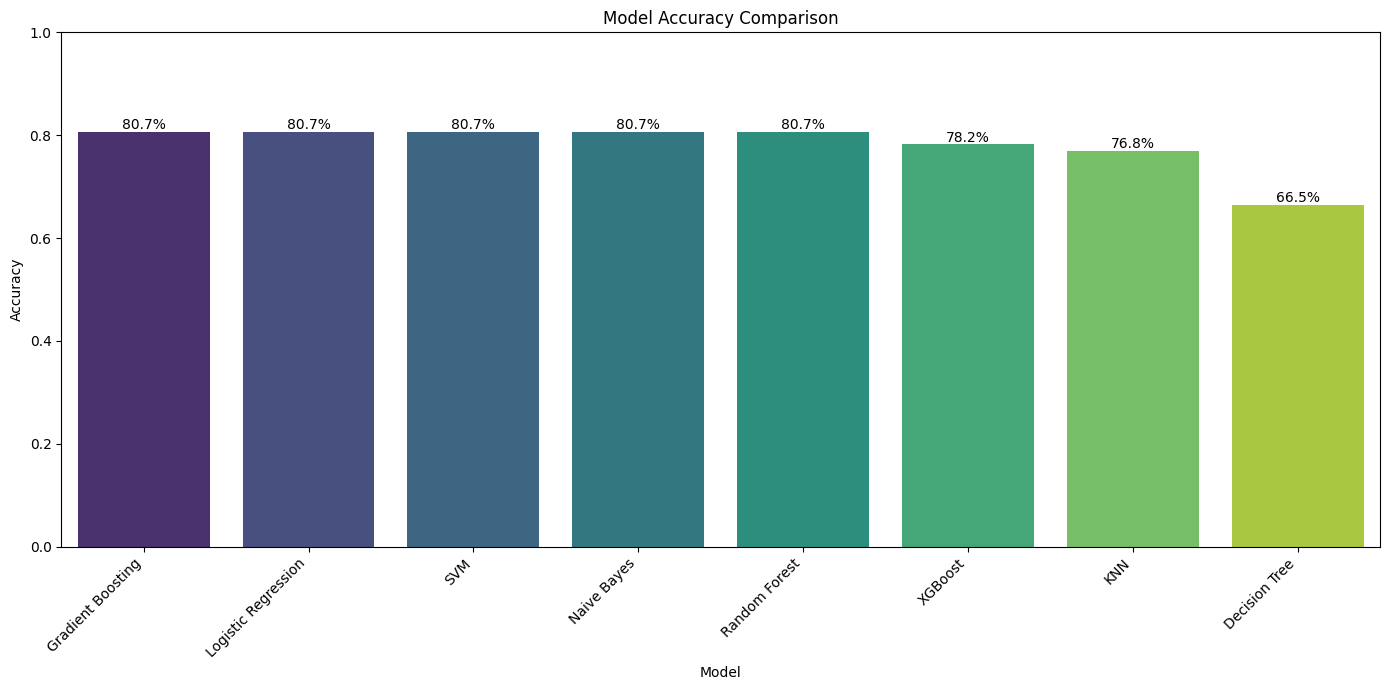

In [59]:
# Create a bar plot to compare accuracy
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()

# Add percentages on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

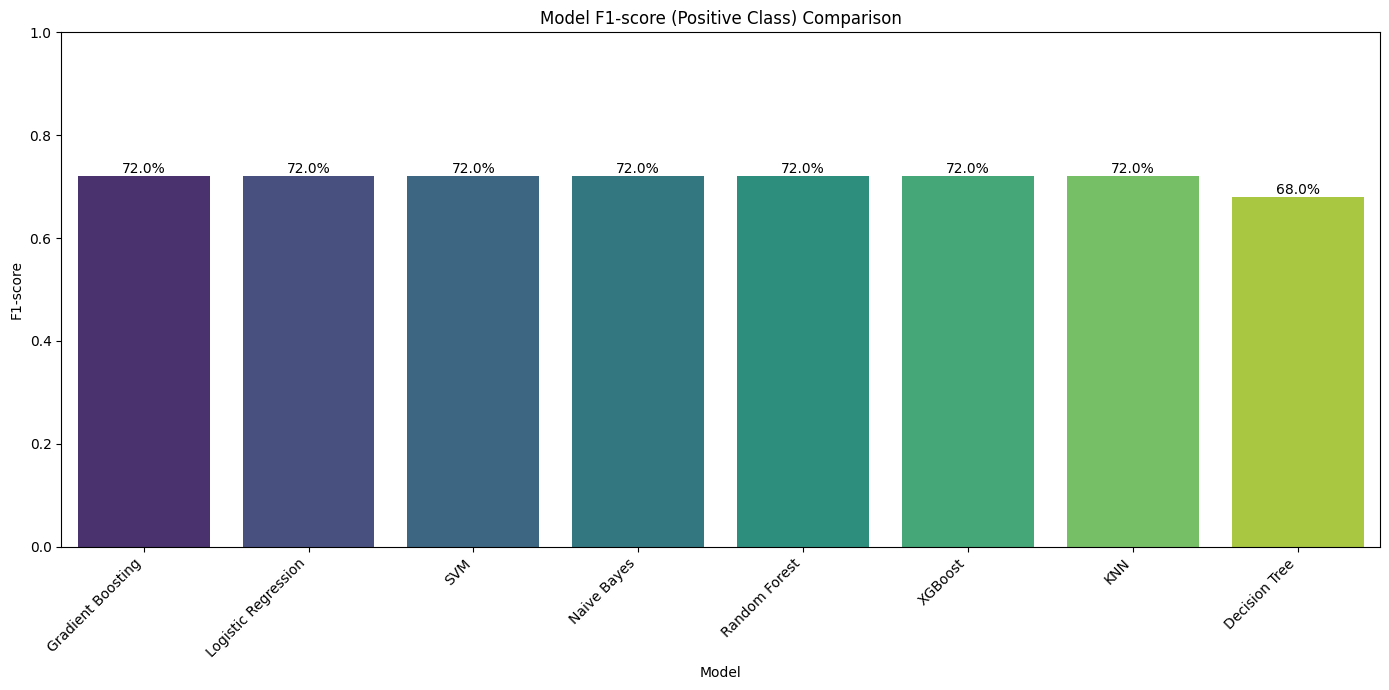

In [60]:
# Create a bar plot to compare F1-score for the positive class
comparison_df = comparison_df.sort_values(by='F1-score (Positive Class)', ascending=False)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Model', y='F1-score (Positive Class)', data=comparison_df, palette='viridis')
plt.title('Model F1-score (Positive Class) Comparison')
plt.ylabel('F1-score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()

# Add percentages on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [77]:
# Create a DataFrame to compare metrics before and after SMOTE
comparison_df_full = pd.DataFrame({
    'Model': model_names,
    'Accuracy (Original)': accuracy_scores,
    'Precision (Original)': [
        float(classification_report(y_test, y_pred).split()[7]) if 'y_pred' in locals() else None,
        float(classification_report(y_test, y_pred_nb).split()[7]) if 'y_pred_nb' in locals() else None,
        float(classification_report(y_test, y_pred_svm).split()[7]) if 'y_pred_svm' in locals() else None,
        float(classification_report(y_test, y_pred_knn).split()[7]) if 'y_pred_knn' in locals() else None,
        float(classification_report(y_test, y_pred_dt).split()[7]) if 'y_pred_dt' in locals() else None,
        float(classification_report(y_test, y_pred_rf).split()[7]) if 'y_pred_rf' in locals() else None,
        float(classification_report(y_test, y_pred_gb).split()[7]) if 'y_pred_gb' in locals() else None,
        float(classification_report(y_test, y_pred_xgb).split()[7]) if 'y_pred_xgb' in locals() else None,
    ],
    'Recall (Original)': [
        float(classification_report(y_test, y_pred).split()[8]) if 'y_pred' in locals() else None,
        float(classification_report(y_test, y_pred_nb).split()[8]) if 'y_pred_nb' in locals() else None,
        float(classification_report(y_test, y_pred_svm).split()[8]) if 'y_pred_svm' in locals() else None,
        float(classification_report(y_test, y_pred_knn).split()[8]) if 'y_pred_knn' in locals() else None,
        float(classification_report(y_test, y_pred_dt).split()[8]) if 'y_pred_dt' in locals() else None,
        float(classification_report(y_test, y_pred_rf).split()[8]) if 'y_pred_rf' in locals() else None,
        float(classification_report(y_test, y_pred_gb).split()[8]) if 'y_pred_gb' in locals() else None,
        float(classification_report(y_test, y_pred_xgb).split()[8]) if 'y_pred_xgb' in locals() else None,
    ],
     'F1-score (Original)': [
        float(classification_report(y_test, y_pred).split()[9]) if 'y_pred' in locals() else None,
        float(classification_report(y_test, y_pred_nb).split()[9]) if 'y_pred_nb' in locals() else None,
        float(classification_report(y_test, y_pred_svm).split()[9]) if 'y_pred_svm' in locals() else None,
        float(classification_report(y_test, y_pred_knn).split()[9]) if 'y_pred_knn' in locals() else None,
        float(classification_report(y_test, y_pred_dt).split()[9]) if 'y_pred_dt' in locals() else None,
        float(classification_report(y_test, y_pred_rf).split()[9]) if 'y_pred_rf' in locals() else None,
        float(classification_report(y_test, y_pred_gb).split()[9]) if 'y_pred_gb' in locals() else None,
        float(classification_report(y_test, y_pred_xgb).split()[9]) if 'y_pred_xgb' in locals() else None,
    ],
    'Accuracy (Resampled)': [accuracy_lr_resampled, accuracy_nb_resampled, accuracy_svm_resampled, accuracy_knn_resampled, accuracy_dt_resampled, accuracy_rf_resampled, accuracy_gb_resampled, accuracy_xgb_resampled],
    'Precision (Resampled)': [precision_lr_resampled, precision_nb_resampled, precision_svm_resampled, precision_knn_resampled, precision_dt_resampled, precision_rf_resampled, precision_gb_resampled, precision_xgb_resampled],
    'Recall (Resampled)': [recall_lr_resampled, recall_nb_resampled, recall_svm_resampled, recall_knn_resampled, recall_dt_resampled, recall_rf_resampled, recall_gb_resampled, recall_xgb_resampled],
    'F1-score (Resampled)': [f1_lr_resampled, f1_nb_resampled, f1_svm_resampled, f1_knn_resampled, f1_dt_resampled, f1_rf_resampled, f1_gb_resampled, f1_xgb_resampled],
    'AUC-ROC (Resampled)': [auc_lr_resampled, auc_nb_resampled, auc_svm_resampled, auc_knn_resampled, auc_dt_resampled, auc_rf_resampled, auc_gb_resampled, auc_xgb_resampled if auc_xgb_resampled is not None else 'N/A']
})

print("Model Performance Comparison (Before and After SMOTE):")
display(comparison_df_full)

Model Performance Comparison (Before and After SMOTE):


,Model,Accuracy (Original),Precision (Original),Recall (Original),F1-score (Original),Accuracy (Resampled),Precision (Resampled),Recall (Resampled),F1-score (Resampled),AUC-ROC (Resampled)
0,Logistic Regression,0.8065,0.89,1600.0,1.0,0.5165,0.64,1600.0,1.0,0.480194
1,Naive Bayes,0.8065,0.89,1600.0,1.0,0.5440,0.68,1600.0,1.0,0.471255
2,SVM,0.8065,0.89,1600.0,1.0,0.6615,0.79,1600.0,1.0,0.499536
3,KNN,0.7685,0.87,1600.0,1.0,0.5010,0.62,1600.0,1.0,0.497480
4,Decision Tree,0.6645,0.78,1600.0,1.0,0.6410,0.77,1600.0,1.0,0.490625
5,Random Forest,0.8065,0.89,1600.0,1.0,0.7960,0.89,1600.0,1.0,0.484312
6,Gradient Boosting,0.8070,0.89,1600.0,1.0,0.7995,0.89,1600.0,1.0,0.488398
7,XGBoost,0.7820,0.87,1600.0,1.0,0.7705,0.87,1600.0,1.0,0.480272
